## Kaggle Facial Keypoints Detection Project

[Kaggle page](https://www.kaggle.com/c/facial-keypoints-detection/details/getting-started-with-r)

efg, 2015-11-29

## EBImage Package Experiments

EBImage is an [image processing and analysis toolbox for R](http://bioconductor.org/packages/release/bioc/html/EBImage.html), which is part of Bioconductor.

efg's R Notes:  [EBImage Bioconductor Package](http://earlglynn.github.io/RNotes/package/EBImage/index.html).


## Setup
Starts with file `kaggle-facial-keypoints-data.Rd` created in _Step A, Getting Started_.

In [1]:
time1 <- Sys.time()          
cat(format(time1, "%Y-%m-%d %H:%M:%S"), "\n")

source("efg-imagelib.R")   # EBITrainMatrix
library(EBImage)

2015-11-29 15:37:38 


## Load R data file

"d" for data and "im" for images in the following variables.  

In [2]:
load(file='C:/Kaggle/2015/Facial-Keypoints/data/kaggle-facial-keypoints-data.Rd', verbose=TRUE)

Loading objects:
  dTrain
  imTrain
  dTest
  imTest


## Sample Image

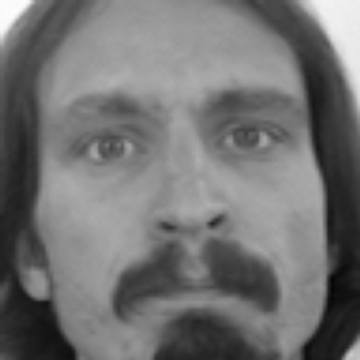

In [3]:
options(repr.plot.width=3, repr.plot.height=3)
par(mar=c(1,1,1,1))

p <- Image(EBITrainMatrix(1))
display(p, method="raster")    

## High-Pass Laplacian Filters

In [4]:
laplacian <- matrix(1, nc=3, nr=3)
laplacian[2,2] = -8
laplacian


1,1,1
1,-8,1
1,1,1


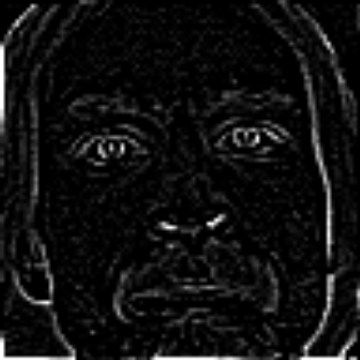

In [5]:
y <- filter2(p, laplacian)
display(y, method="raster")    

In [6]:
laplacian <- matrix(1, nc=5, nr=5)
laplacian[3,3] = -24
laplacian          

1,1,1,1,1
1,1,1,1,1
1,1,-24,1,1
1,1,1,1,1
1,1,1,1,1


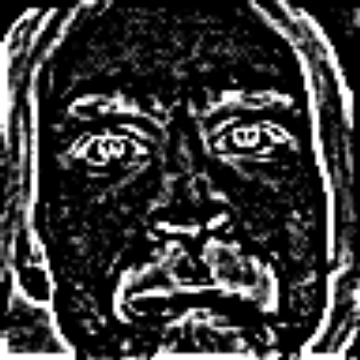

In [7]:
y <- filter2(p, laplacian)
display(y, method="raster") 

## Blur

In [8]:
pBlur <- gblur(p, sigma=1)
pBlur

Image 
  colorMode    : Grayscale 
  storage.mode : double 
  dim          : 96 96 
  frames.total : 1 
  frames.render: 1 

imageData(object)[1:5,1:6]
          [,1]      [,2]      [,3]      [,4]      [,5]      [,6]
[1,] 0.8092035 0.9352276 0.9631635 0.9649503 0.9628155 0.9573532
[2,] 0.7801177 0.9400473 0.9762661 0.9783772 0.9721664 0.9542429
[3,] 0.7658717 0.9394911 0.9785096 0.9758727 0.9528803 0.9030591
[4,] 0.7549768 0.9361530 0.9712435 0.9496381 0.8899282 0.7985872
[5,] 0.7416796 0.9249149 0.9409692 0.8804678 0.7801052 0.6736067

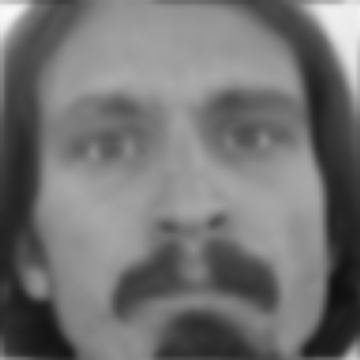

In [9]:
display(pBlur, method="raster")   

## Threshold

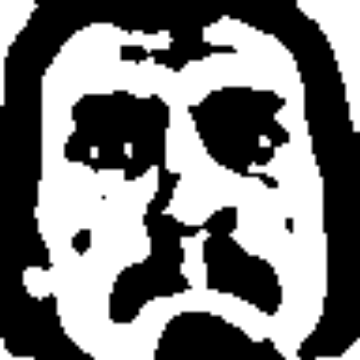

In [10]:
p2 <- thresh(pBlur, 10, 10, 0.01)
display(p2, method="raster")               

## makeBrush Filter

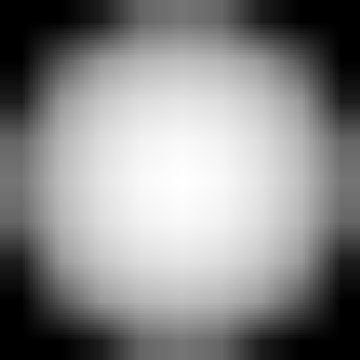

In [11]:
x <- makeBrush(9, shape="disc", step=FALSE)
display(x, title="makeBrush(99, shape='disc', step=FALSE)", method="raster")
x <- x / sum(x)

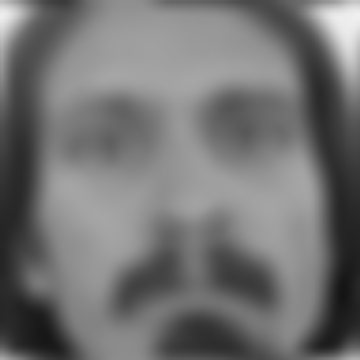

In [12]:
y <- filter2(p, x)
display(y, method="raster")   

In [13]:
x = makeBrush(9, shape="gaussian", sigma=5)
x <- x / sum(x)
x

0.008386164,0.009646385,0.010660904,0.011320138,0.011548820,0.011320138,0.010660904,0.009646385,0.008386164
0.009646385,0.011095984,0.012262959,0.013021258,0.013284305,0.013021258,0.012262959,0.011095984,0.009646385
0.01066090,0.01226296,0.01355267,0.01439072,0.01468143,0.01439072,0.01355267,0.01226296,0.01066090
0.01132014,0.01302126,0.01439072,0.01528059,0.01558928,0.01528059,0.01439072,0.01302126,0.01132014
0.01154882,0.01328430,0.01468143,0.01558928,0.01590420,0.01558928,0.01468143,0.01328430,0.01154882
0.01132014,0.01302126,0.01439072,0.01528059,0.01558928,0.01528059,0.01439072,0.01302126,0.01132014
0.01066090,0.01226296,0.01355267,0.01439072,0.01468143,0.01439072,0.01355267,0.01226296,0.01066090
0.009646385,0.011095984,0.012262959,0.013021258,0.013284305,0.013021258,0.012262959,0.011095984,0.009646385
0.008386164,0.009646385,0.010660904,0.011320138,0.011548820,0.011320138,0.010660904,0.009646385,0.008386164


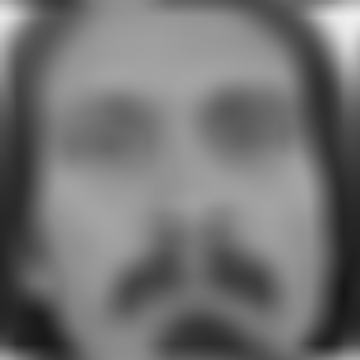

In [14]:
y <- filter2(p, x)
display(y, method="raster")  

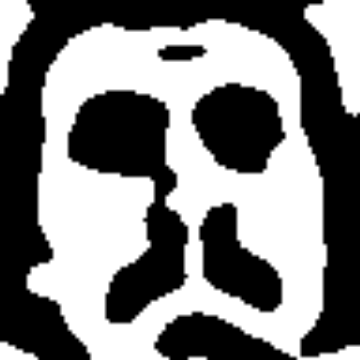

In [15]:
display(thresh(y, 10, 10, 0.01), method="raster")

## Properties

### Basic

In [16]:
computeFeatures.basic(properties=TRUE)  

,name,translation.invariant,rotation.invariant
1,b.mean,TRUE,TRUE
2,b.sd,TRUE,TRUE
3,b.mad,TRUE,TRUE
4,b.q001,TRUE,TRUE
5,b.q005,TRUE,TRUE
6,b.q05,TRUE,TRUE
7,b.q095,TRUE,TRUE
8,b.q099,TRUE,TRUE


### Shape

In [17]:
computeFeatures.shape(properties=TRUE) 

,name,translation.invariant,rotation.invariant
1,s.area,TRUE,TRUE
2,s.perimeter,TRUE,TRUE
3,s.radius.mean,TRUE,TRUE
4,s.radius.sd,TRUE,TRUE
5,s.radius.min,TRUE,TRUE
6,s.radius.max,TRUE,TRUE


### Moment

In [18]:
computeFeatures.moment(properties=TRUE)

,name,translation.invariant,rotation.invariant
1,m.cx,FALSE,TRUE
2,m.cy,FALSE,TRUE
3,m.majoraxis,TRUE,TRUE
4,m.eccentricity,TRUE,TRUE
5,m.theta,TRUE,FALSE


### Haralick

[Haralick Textural Features](http://earlglynn.github.io/RNotes/package/EBImage/Haralick-Textural-Features.html)

In [19]:
computeFeatures.haralick(properties=TRUE)

,name,translation.invariant,rotation.invariant
1,h.asm.s1,TRUE,TRUE
2,h.con.s1,TRUE,TRUE
3,h.cor.s1,TRUE,TRUE
4,h.var.s1,TRUE,TRUE
5,h.idm.s1,TRUE,TRUE
6,h.sav.s1,TRUE,TRUE
7,h.sva.s1,TRUE,TRUE
8,h.sen.s1,TRUE,TRUE
9,h.ent.s1,TRUE,TRUE
10,h.dva.s1,TRUE,TRUE


## Finalization

In [20]:
time2 <- Sys.time()          
cat(format(time2, "%Y-%m-%d %H:%M:%S"), "\n")

print(time2 - time1)

2015-11-29 15:37:43 
Time difference of 4.935226 secs
